In [156]:
import pandas as pd
from matplotlib.pyplot import plot

In [157]:
options = pd.read_csv("banknifty-options.csv")
prices = pd.read_csv("banknifty-prices.csv")

In [192]:
options["Alpha"] = (prices["Close"] - options["Strike Price"]) / options["Close"]
prices["Change"] = ((prices["Close"] - prices["Open"]) / prices["Close"])*100
# options["Alpha-Prev"] = options.Alpha.shift(1)
options["Alpha-Change"] = ((options["Alpha"] - options.Alpha.shift(1)) / options["Alpha"])*100
options["Alpha-Mean"] = (options.Alpha.shift(1)+options.Alpha.shift(2)+options.Alpha.shift(3)) / 3
options["Change"] = ((options["Open"] - options["Close"]) / options["Open"])*100

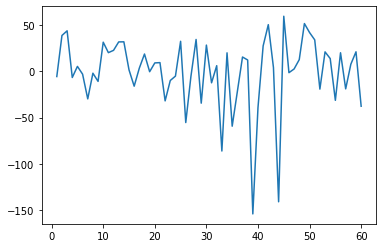

In [193]:
plot(options["Alpha-Change"])
# plot(options["Change"])

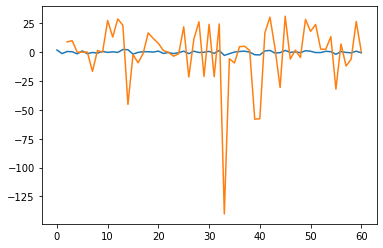

In [194]:
plot(prices["Change"])
plot(options["Change"])

In [195]:
# prices

In [196]:
options[10:]

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,...,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Alpha,Alpha-Change,Alpha-Mean,Change
10,BANKNIFTY,29-Mar-2022,30-Jun-2022,PE,30000,397.45,397.45,288.00,288.50,288.00,...,12,90.97,0.97,1425,-100,-,20.268284,31.281560,15.059064,27.412253
11,BANKNIFTY,30-Mar-2022,30-Jun-2022,PE,30000,287.45,287.45,250.00,250.00,250.00,...,9,68.08,0.58,1300,-125,36334.3,25.337200,20.005825,16.551254,13.028353
12,BANKNIFTY,31-Mar-2022,30-Jun-2022,PE,30000,273.55,273.55,182.30,195.00,195.00,...,28,211.64,1.64,1125,-175,-,32.685128,22.480953,19.844511,28.715043
13,BANKNIFTY,01-Apr-2022,30-Jun-2022,PE,30000,195.00,200.00,101.00,149.65,140.25,...,66,497.26,2.26,1675,550,-,47.768126,31.575443,26.096871,23.256410
14,BANKNIFTY,04-Apr-2022,30-Jun-2022,PE,30000,85.00,126.00,85.00,123.50,123.50,...,51,383.87,1.37,2300,625,-,69.920648,31.682375,35.263485,-45.294118
15,BANKNIFTY,05-Apr-2022,30-Jun-2022,PE,30000,111.40,119.00,100.00,113.75,116.00,...,25,188.18,0.68,2375,75,-,70.926593,1.418291,50.124634,-2.109515
16,BANKNIFTY,06-Apr-2022,30-Jun-2022,PE,30000,114.40,125.00,114.40,125.00,125.00,...,64,481.95,1.95,3500,1125,37632.8,61.062400,-16.154284,62.871789,-9.265734
17,BANKNIFTY,07-Apr-2022,30-Jun-2022,PE,30000,118.40,120.00,104.50,119.65,120.00,...,47,353.88,1.38,4450,950,-,63.162140,3.324364,67.303214,-1.055743
18,BANKNIFTY,08-Apr-2022,30-Jun-2022,PE,30000,120.00,120.00,99.00,100.00,99.00,...,21,158.06,0.56,4675,225,-,77.520500,18.522017,65.050378,16.666667
19,BANKNIFTY,11-Apr-2022,30-Jun-2022,PE,30000,112.00,129.95,95.00,98.75,100.00,...,37,278.45,0.95,5175,500,-,77.101772,-0.543085,67.248347,11.830357


In [202]:
threshold = 0.3
max_profit = 0
optimal_thresh = 0
while(threshold <= 2):
    net_result = 0
    threshold += 0.01
    for index,rows in options.iterrows():
        if index < 20:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > threshold:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
    if net_result >= max_profit:
        max_profit = net_result
        optimal_thresh = threshold

print("Net profit : " + str(max_profit))
print("Optimal Threshold: " + str(optimal_thresh))

Net profit : 47.697836164226715
Optimal Threshold: 2.0000000000000013


In [203]:
net_result = 0
for index,rows in options.iterrows():
        if index < 0:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > 1.5:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
print(str(net_result))   

21.662641391634285
